In [83]:
#imports
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from scipy.stats import zscore
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

## a)	Refer to this link, https://archive.ics.uci.edu/ml/datasets/parkinsons and read the description of the dataset and attach suitable headers

In [84]:
data = pd.read_csv("parkinson.csv")
data.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer    ...     \
0           0.00007   0.00370   0.00554     0.01109       0.04374    ...      
1           0.00008   0.00465   0.00696     0.01394       0.06134    ...      
2           0.00009   0.00544   0.00781     0.01633       0.05233    ...      
3           0.00009   0.00502   0.00698     0.01505       0.05492    ...      
4           0.00011   0.00655   0.00908     0.01966       0.06425    ...      

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  

[5 rows x 24 columns]

In [85]:
print(data.columns.size)
data.columns

24


Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [86]:
data = data.drop("name", axis = 1)

## b)	Status is the outcome variable, with ‘0’ – healthy and ‘1’ – Parkinson Disease. Perform EDA and apply suitable algorithm (pick among Logistic Regression, Naive’s Bayes, KNN), which is giving best score with 70/30 validation split with precision and recall score, ROC curve and AUC value. Finally, choose the best model out of 3.

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null float64
D2                  195 non-null flo

In [88]:
data.describe().T

count        mean        std         min         25%  \
MDVP:Fo(Hz)       195.0  154.228641  41.390065   88.333000  117.572000   
MDVP:Fhi(Hz)      195.0  197.104918  91.491548  102.145000  134.862500   
MDVP:Flo(Hz)      195.0  116.324631  43.521413   65.476000   84.291000   
MDVP:Jitter(%)    195.0    0.006220   0.004848    0.001680    0.003460   
MDVP:Jitter(Abs)  195.0    0.000044   0.000035    0.000007    0.000020   
MDVP:RAP          195.0    0.003306   0.002968    0.000680    0.001660   
MDVP:PPQ          195.0    0.003446   0.002759    0.000920    0.001860   
Jitter:DDP        195.0    0.009920   0.008903    0.002040    0.004985   
MDVP:Shimmer      195.0    0.029709   0.018857    0.009540    0.016505   
MDVP:Shimmer(dB)  195.0    0.282251   0.194877    0.085000    0.148500   
Shimmer:APQ3      195.0    0.015664   0.010153    0.004550    0.008245   
Shimmer:APQ5      195.0    0.017878   0.012024    0.005700    0.009580   
MDVP:APQ          195.0    0.024081   0.016947    0.007190    0.013080   
Shimmer:DDA       195.0    0.046993   0.030459    0.013640    0.024735   
NHR               195.0    0.024847   0.040418    0.000650    0.005925   
HNR               195.0   21.885974   4.425764    8.441000   19.198000   
status            195.0    0.753846   0.431878    0.000000    1.000000   
RPDE              195.0    0.498536   0.103942    0.256570    0.421306   
DFA               195.0    0.718099   0.055336    0.574282    0.674758   
spread1           195.0   -5.684397   1.090208   -7.964984   -6.450096   
spread2           195.0    0.226510   0.083406    0.006274    0.174351   
D2                195.0    2.381826   0.382799    1.423287    2.099125   
PPE               195.0    0.206552   0.090119    0.044539    0.137451   

                         50%         75%         max  
MDVP:Fo(Hz)       148.790000  182.769000  260.105000  
MDVP:Fhi(Hz)      175.829000  224.205500  592.030000  
MDVP:Flo(Hz)      104.315000  140.018500  239.170000  
MDVP:Jitter(%)      0.004940    0.007365    0.033160  
MDVP:Jitter(Abs)    0.000030    0.000060    0.000260  
MDVP:RAP            0.002500    0.003835    0.021440  
MDVP:PPQ            0.002690    0.003955    0.019580  
Jitter:DDP          0.007490    0.011505    0.064330  
MDVP:Shimmer        0.022970    0.037885    0.119080  
MDVP:Shimmer(dB)    0.221000    0.350000    1.302000  
Shimmer:APQ3        0.012790    0.020265    0.056470  
Shimmer:APQ5        0.013470    0.022380    0.079400  
MDVP:APQ            0.018260    0.029400    0.137780  
Shimmer:DDA         0.038360    0.060795    0.169420  
NHR                 0.011660    0.025640    0.314820  
HNR                22.085000   25.075500   33.047000  
status              1.000000    1.000000    1.000000  
RPDE                0.495954    0.587562    0.685151  
DFA                 0.722254    0.761881    0.825288  
spread1            -5.720868   -5.046192   -2.434031  
spread2             0.218885    0.279234    0.450493  
D2                  2.361532    2.636456    3.671155  
PPE                 0.194052    0.252980    0.527367

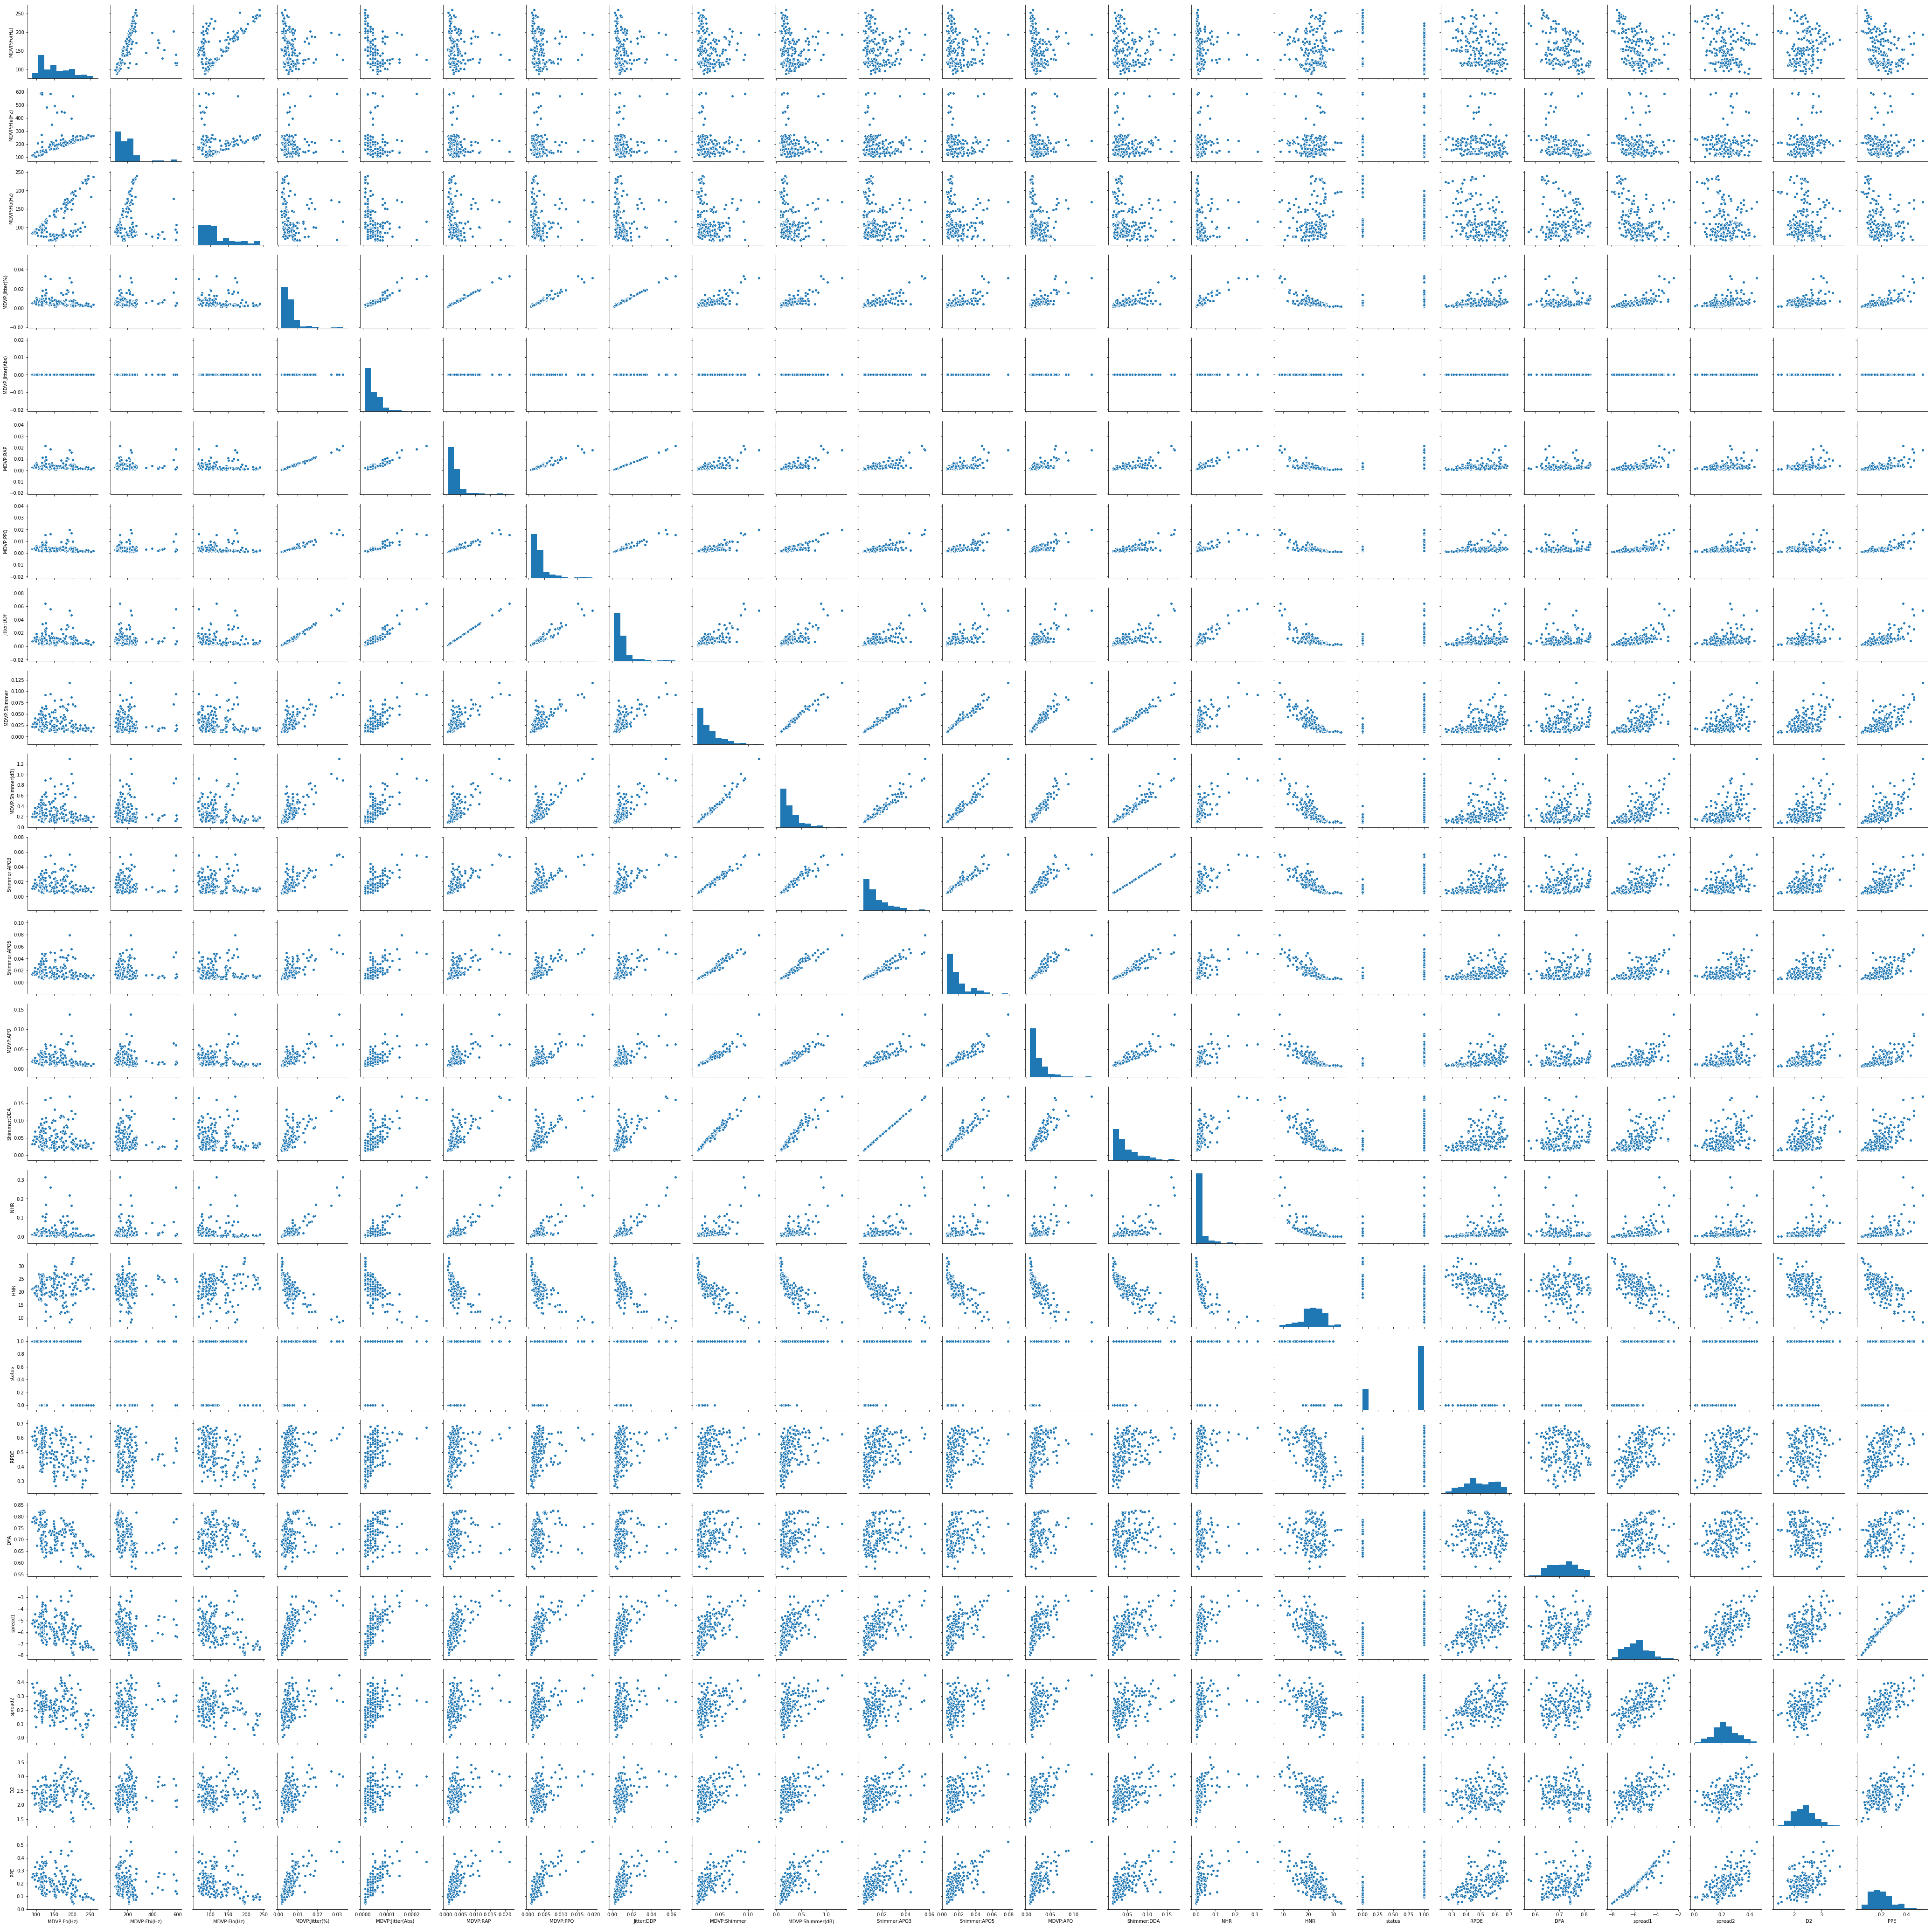

In [89]:
sns.pairplot(data)
plt.show()

In [90]:
corrr = data.corr()
sns.heatmap(corrr)
plt.show()

In [91]:
from sklearn.model_selection import train_test_split

X =  data.drop("status", axis=1)
y =  data.pop("status")

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [120]:
#Scale the data
independent_scaler = StandardScaler()
X_train = independent_scaler.fit_transform (X_train) #fit and transform
X_test = independent_scaler.transform (X_test) # only transform

In [121]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [122]:
Y_predict = logistic_model.predict(X_test)
Y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1], dtype=int64)

In [123]:
print(metrics.classification_report(Y_test,Y_predict))
metrics.accuracy_score(Y_test,Y_predict)

             precision    recall  f1-score   support

          0       0.79      0.58      0.67        19
          1       0.82      0.93      0.87        40

avg / total       0.81      0.81      0.80        59



0.8135593220338984

Area Under the curve 0.7519736842105262


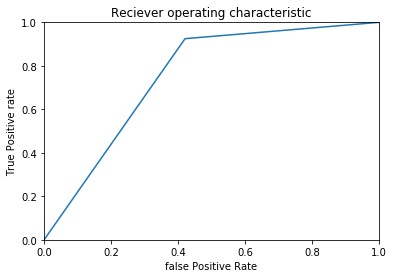

In [124]:
fpr, tpr, _ = metrics.roc_curve(Y_test,Y_predict)
roc_auc = metrics.auc(fpr, tpr)
print('Area Under the curve', roc_auc)
plt.figure()
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('false Positive Rate')
plt.ylabel('True Positive rate')
plt.title('Reciever operating characteristic')
plt.show()

In [126]:
KNClassifier = KNeighborsClassifier(n_neighbors= 21 , metric='euclidean')
KNClassifier.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=21, p=2,
           weights='uniform')

In [127]:
Y_predict = KNClassifier.predict(X_test)
Y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [128]:
print(metrics.classification_report(Y_test,Y_predict))
metrics.accuracy_score(Y_test,Y_predict)

             precision    recall  f1-score   support

          0       1.00      0.26      0.42        19
          1       0.74      1.00      0.85        40

avg / total       0.82      0.76      0.71        59



0.7627118644067796

In [129]:
fpr, tpr, _ = metrics.roc_curve(Y_test,Y_predict)
roc_auc = metrics.auc(fpr, tpr)
print('Area Under the curve', roc_auc)
plt.figure()
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('false Positive Rate')
plt.ylabel('True Positive rate')
plt.title('Reciever operating characteristic')
plt.show()

Area Under the curve 0.631578947368421


In [131]:
NBClassifier = GaussianNB()
NBClassifier.fit(X_train,Y_train)

GaussianNB(priors=None)

In [132]:
Y_predict = NBClassifier.predict(X_test)

In [133]:
print(metrics.accuracy_score(Y_test,Y_predict))
print(metrics.classification_report(Y_test,Y_predict))

0.6779661016949152
             precision    recall  f1-score   support

          0       0.50      0.84      0.63        19
          1       0.89      0.60      0.72        40

avg / total       0.76      0.68      0.69        59



Area Under the curve 0.7210526315789474


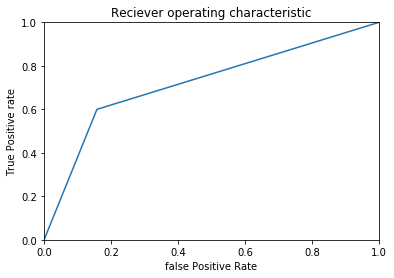

In [134]:
fpr, tpr, _ = metrics.roc_curve(Y_test,Y_predict)
roc_auc = metrics.auc(fpr, tpr)
print('Area Under the curve', roc_auc)
plt.figure()
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('false Positive Rate')
plt.ylabel('True Positive rate')
plt.title('Reciever operating characteristic')
plt.show()

According to the accuracy score, Precision, recall, ROC and AUC values, logistic regression is the best algorithm to use for this dataset.
* Accuracy score: 0.813
* Precision: 0.81
* Recall: 0.81
* The AUC: 0.7519

## c)	Optimize the model (best model picked in ‘b’) with boosting technique and observe the validation score

In [203]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(base_estimator=logistic_model, n_estimators=1000, learning_rate=0.5)

In [204]:
abcl.fit(X_train,Y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          learning_rate=0.5, n_estimators=1000, random_state=None)

In [205]:
Y_predict = abcl.predict(X_test)

In [206]:
metrics.accuracy_score(Y_test,Y_predict)

0.8135593220338984

In [207]:
print(metrics.classification_report(Y_test,Y_predict))

             precision    recall  f1-score   support

          0       0.79      0.58      0.67        19
          1       0.82      0.93      0.87        40

avg / total       0.81      0.81      0.80        59



Area Under the curve 0.7519736842105262


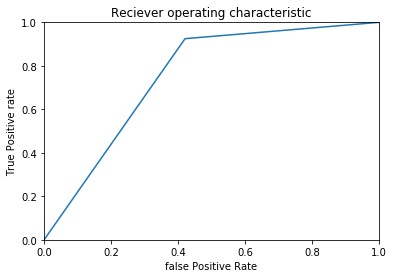

In [208]:
fpr, tpr, _ = metrics.roc_curve(Y_test,Y_predict)
roc_auc = metrics.auc(fpr, tpr)
print('Area Under the curve', roc_auc)
plt.figure()
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('false Positive Rate')
plt.ylabel('True Positive rate')
plt.title('Reciever operating characteristic')
plt.show()

## d)	Comment on (c), whether boosting is improving the model performance or not.

* The model with boosting is giving the same accuracy score ( 0.813 ) 
* The model with boosting is giving the same AUC  ( 0.7519 ) 
* The logistic regression model without boosting technique or with boosting technique does not change the performance

## e)	Optimize the model (best model picked in ‘b’) with bagging technique and observe the validation score

In [209]:
BGClassifier = BaggingClassifier(base_estimator=logistic_model, n_estimators=100, max_samples = 0.5, oob_score=True)
BGClassifier.fit(X_train,Y_train)

BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.5, n_estimators=100, n_jobs=1, oob_score=True,
         random_state=None, verbose=0, warm_start=False)

In [210]:
BGClassifier.oob_score_

0.8676470588235294

In [211]:
Y_predict = BGClassifier.predict(X_test)

In [212]:
metrics.accuracy_score(Y_test,Y_predict)

0.864406779661017

In [213]:
print(metrics.classification_report(Y_test,Y_predict))

             precision    recall  f1-score   support

          0       1.00      0.58      0.73        19
          1       0.83      1.00      0.91        40

avg / total       0.89      0.86      0.85        59



Area Under the curve 0.7894736842105263


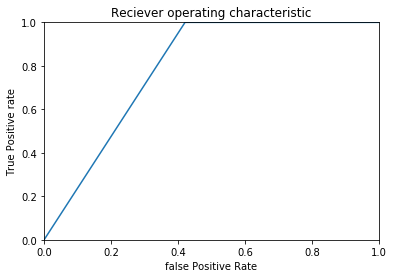

In [214]:
fpr, tpr, _ = metrics.roc_curve(Y_test,Y_predict)
roc_auc = metrics.auc(fpr, tpr)
print('Area Under the curve', roc_auc)
plt.figure()
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('false Positive Rate')
plt.ylabel('True Positive rate')
plt.title('Reciever operating characteristic')
plt.show()

## f)	Comment on (e), whether bagging is improving the model performance or not.

* The model with bagging is giving better prediction with accuracy 0.8644 compared to 0.813
* The model with bagging is giving a better AUC with 0.789 compared to 0.7519
* The logistic regression model with bagging technique is a better approach as the prediction is more accurate than without bagging

## g)	Compare and Contrast both bagging and boosting technique over the best model selected during the step ‘b’ with Bias and Variance Error using 5-fold Cross Validation Score

In [216]:
independent_scaler = StandardScaler()
X_std = independent_scaler.fit_transform (X)

Bagging: 0.769231 (0.147742)
Range: 0.48717948717948717 to 0.9230769230769231
Boosting: 0.784615 (0.130341)
Range: 0.5384615384615384 to 0.9230769230769231
Logistic Regression: 0.779487 (0.140067)
Range: 0.5128205128205128 to 0.9230769230769231


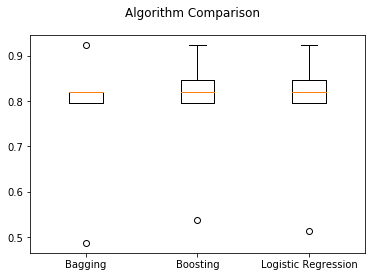

In [226]:
models = []
models.append(('Bagging', BGClassifier))
models.append(('Boosting',abcl))
models.append(('Logistic Regression',logistic_model))
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=5, random_state=12345)
    cv_results = model_selection.cross_val_score(model, X_std, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    print("Range:",cv_results.min(),"to",cv_results.max())
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

* The bias error can be treated as the model's error, the average cross validation score for Bagging is 0.769 and Boosting is 0.784. Bagging method has a slightly higher bias error than boosting
* The variance error in bagging is higher than boosting, we get standard deviation as 0.1477 in bagging and 0.13 in boosting
* Logistic Regression alone is providing to give a better bias and variance tradeoff than the bagging method

# h)	Give your final inference, which optimization technique (Bagging/Boosting) would be chosen while the best model picked in step ‘b’, is going for production system.

* Performed Logistic Regression, KNN and Naive bayes algorithm on the dataset
* Logistic regression turned out to give better accuracy score, precision, recall and AUC
* Logistic regression with boosting technique with 70/30 training split of the data gave no change in the accuracy score, precision, recall or AUC
* Logistic regression with bagging technique with 70/30 training split of the data proved to give a better prediction
* During 5-Fold validation process, boosting proved to be slightly better than the bagging technique
* The validation technique k-fold validation can be chosen for prodcution system over train and test split validation technique
* Since boosting proved to be slightly better than bagging technique, we can use Logistic Regression algorithm with boosting ensemble technique for prediction of Parkinson's disease in patients